# Potable Water Volumes

In [1]:
%load_ext autoreload
%autoreload 2

%run relativepath.py
%run commonimports.py
%run displayoptions.py

In [4]:
potable_water_dataset = StatscanZip('https://www150.statcan.gc.ca/n1/en/tbl/csv/38100092-eng.zip?st=yQYQGvmD')
potable_water = potable_water_dataset.get_data(index_col='REF_DATE')

In [48]:
potable_water_dataset.get_data(wide=False)

,REF_DATE,GEO,Type of water source,VALUE
0,2005,Canada,All source water types,5706.2
1,2005,Canada,Surface water,5031.9
2,2005,Canada,Groundwater and groundwater under the direct influence of surface water (GUDI),674.3
3,2005,Canada,Groundwater,NaN
4,2005,Canada,Groundwater under the direct influence of surface water (GUDI),NaN
5,2005,Newfoundland and Labrador,All source water types,153.3
6,2005,Newfoundland and Labrador,Surface water,140.4
7,2005,Newfoundland and Labrador,Groundwater and groundwater under the direct influence of surface water (GUDI),12.8
8,2005,Newfoundland and Labrador,Groundwater,NaN
9,2005,Newfoundland and Labrador,Groundwater under the direct influence of surface water (GUDI),NaN


In [15]:
potable_water.head()

,GEO,All source water types,Groundwater,Groundwater and groundwater under the direct influence of surface water (GUDI),Groundwater under the direct influence of surface water (GUDI),Surface water
REF_DATE,,,,,,
2005,Canada,5706.2,NaN,674.3,NaN,5031.9
2005,Newfoundland and Labrador,153.3,NaN,12.8,NaN,140.4
2005,Prince Edward Island,9.9,NaN,9.9,NaN,0.0
2005,Nova Scotia,111.2,NaN,11.1,NaN,100.1
2005,New Brunswick,109.4,NaN,30.7,NaN,78.7


In [17]:
potable_column_subset = potable_water[['GEO', 'All source water types']]

## By Province

In [18]:
potable_latest = potable_column_subset[potable_water.index == 2015]

In [38]:
potable_latest
water_by_province = potable_latest[~(potable_latest.GEO.str.match('.* region|Canada'))]\
            .rename(columns={'All source water types':'Volume'}).sort_values('Volume', ascending=True).set_index('GEO')
water_by_province

,Volume
GEO,
Nunavut,2.7
Northwest Territories,5.4
Yukon,7.1
Prince Edward Island,11.3
Nova Scotia,90.6
New Brunswick,100.1
Manitoba,109.3
Saskatchewan,121.5
Newfoundland and Labrador,128.1


Text(1400,0.2,'Source: Statscan')

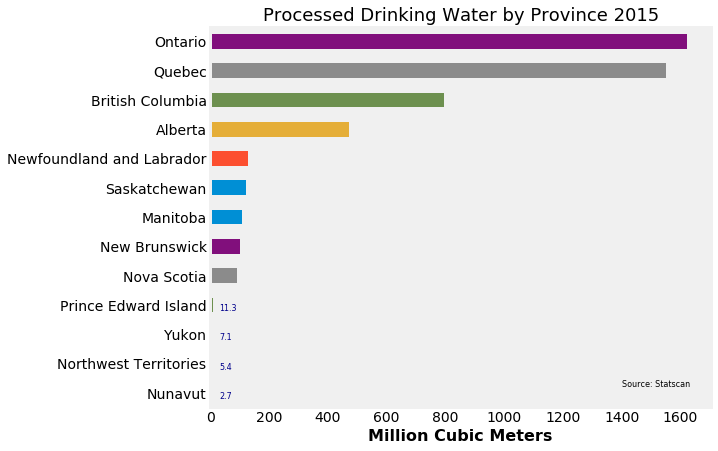

In [94]:
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline
ax = water_by_province.Volume.plot.barh( figsize=(8,7), grid=False)
ax.grid(False, axis='y')
ax.set_title(label='Processed Drinking Water by Province 2015', fontsize=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Million Cubic Meters', fontsize=16, fontweight='bold')
ax.set_ylabel('')
ax.text(s='2.7', x=30, y=-.2, size=8,color='darkblue')
ax.text(s='5.4', x=30, y=.8, size=8, color='darkblue')
ax.text(s='7.1', x=30, y=1.8, size=8, color='darkblue')
ax.text(s='11.3', x=30, y=2.8, size=8, color='darkblue')
ax.text(s='Source: Statscan', x=1400, y=.2, size=8)

In [67]:
ax.get_ylim()

(-0.5, 12.5)